In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [30]:
from platform import python_version
python_version()

'3.9.7'

In [3]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]


KeyboardInterrupt: 

In [4]:
#for table in tables:
    #print(table.name)

In [ ]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

In [6]:
#for column in meta.columns:
    #print(column.name)

In [7]:
clusters = ['Berkeley_20', 'Berkeley_22', 'Berkeley_29', 'Berkeley_23','Berkeley_31','King_8','Haffner_18']
#clusters = ['Auner_1', 'Berkeley_73']

In [8]:
dados = pd.read_csv('TABLE_DIAS')
dc = dados[dados['Cluster']=='Berkeley_23']
dc.head()

_RAJ2000   _DEJ2000      _r      Cluster  RA_ICRS  DE_ICRS    r50    N  \
122   98.3161  20.537506  0.0501  Berkeley_23  98.3161  20.5375  0.036  103   

      pmRA  e_pmRA  ...  logage  e_logage  [Fe/H]  e_[Fe/H]     Av   e_Av  \
122 -0.069   0.167  ...   9.244     0.174   0.055     0.083  0.862  0.135   

                      FileName      SimbadName  _RA.icrs  _DE.icrs  
122  clusters1/Berkeley_23.dat  Cl Berkeley 23   98.3161   20.5375  

[1 rows x 29 columns]

In [9]:
query = """SELECT 
ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS',98.3161,20.537506, 0.2))
"""

In [10]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [11]:
data = job.get_results()

In [12]:
len(data)

5432

In [13]:
data#.show_in_notebook()

<Table length=5432>
        ra               dec         ...         l                  b        
       deg               deg         ...        deg                deg       
     float64           float64       ...      float64            float64     
----------------- ------------------ ... ------------------ -----------------
98.35005464165842  20.34186248269788 ... 192.78167233294792 5.330448475713683
98.41149568652337 20.359127818776102 ... 192.79246767088588 5.389617964664992
98.37861723625792 20.350157223635733 ... 192.78645341480026 5.358077111126193
98.36028621373684 20.343793746759943 ... 192.78431640654998 5.339873593603409
98.36969547639049 20.344009472127425 ... 192.78814402186504 5.347833282484086
98.36658698985006  20.34661401331052 ... 192.78448464550974 5.346417811217697
              ...                ... ...                ...               ...
98.21593017018945  20.70802545923287 ... 192.39670685875478 5.384732879806451
98.21935381678283  20.70887494566982 ...  192.3974069574336   5.3879719386321
98.22288454453562  20.71135055202122 ... 192.39669731856173 5.392038448633415
98.22036502344264 20.713763810977692 ... 192.39346289199742 5.391034164901363
 98.2168106144897 20.713003769392877 ...  192.3926270541432  5.38772681763588
98.23248755918617 20.720189015572835 ... 192.39288237610265 5.404053956846193

In [14]:
df = data.to_pandas()
df

ra        dec      pmra  pmra_error     pmdec  pmdec_error  \
0     98.350055  20.341862  0.859905    0.025662 -2.641193     0.020173   
1     98.411496  20.359128  2.152265    0.370010 -1.133286     0.263029   
2     98.378617  20.350157  0.924640    0.258991 -1.127057     0.190914   
3     98.360286  20.343794 -1.040279    0.667882 -1.878632     0.491239   
4     98.369695  20.344009  0.623995    0.405479 -2.937393     0.274218   
...         ...        ...       ...         ...       ...          ...   
5427  98.219354  20.708875  0.949584    0.476781  0.013241     0.330522   
5428  98.222885  20.711351  1.399444    0.423079 -0.053077     0.294669   
5429  98.220365  20.713764  2.899974    0.403112 -3.484141     0.278225   
5430  98.216811  20.713004 -1.465820    1.580673 -1.793014     0.987502   
5431  98.232488  20.720189       NaN         NaN       NaN          NaN   

         bp_rp  phot_g_mean_mag  parallax  parallax_error  radial_velocity  \
0     0.670877        14.261889  0.585068        0.024480              NaN   
1     2.150219        18.876717  0.398297        0.353935              NaN   
2     1.203728        18.397947 -0.303128        0.200119              NaN   
3     1.766933        19.867931  0.472575        0.638889              NaN   
4     1.318716        19.113560  0.084355        0.385189              NaN   
...        ...              ...       ...             ...              ...   
5427  1.625120        19.486835  0.678473        0.576026              NaN   
5428  1.631449        19.307213 -0.227514        0.490116              NaN   
5429  1.939724        19.109995  0.489096        0.425680              NaN   
5430  1.651293        20.414825 -0.718185        1.160468              NaN   
5431  0.994280        20.571396       NaN             NaN              NaN   

      radial_velocity_error           l         b  
0                       NaN  192.781672  5.330448  
1                       NaN  192.792468  5.389618  
2                       NaN  192.786453  5.358077  
3                       NaN  192.784316  5.339874  
4                       NaN  192.788144  5.347833  
...                     ...         ...       ...  
5427                    NaN  192.397407  5.387972  
5428                    NaN  192.396697  5.392038  
5429                    NaN  192.393463  5.391034  
5430                    NaN  192.392627  5.387727  
5431                    NaN  192.392882  5.404054  

[5432 rows x 14 columns]

In [15]:
ndf = df.dropna(how='any',subset=['pmra', 'pmdec', 'parallax'])
ndf

ra        dec      pmra  pmra_error      pmdec  pmdec_error  \
0     98.350055  20.341862  0.859905    0.025662  -2.641193     0.020173   
1     98.411496  20.359128  2.152265    0.370010  -1.133286     0.263029   
2     98.378617  20.350157  0.924640    0.258991  -1.127057     0.190914   
3     98.360286  20.343794 -1.040279    0.667882  -1.878632     0.491239   
4     98.369695  20.344009  0.623995    0.405479  -2.937393     0.274218   
...         ...        ...       ...         ...        ...          ...   
5426  98.215930  20.708025 -0.007647    1.268508 -15.037385     1.060649   
5427  98.219354  20.708875  0.949584    0.476781   0.013241     0.330522   
5428  98.222885  20.711351  1.399444    0.423079  -0.053077     0.294669   
5429  98.220365  20.713764  2.899974    0.403112  -3.484141     0.278225   
5430  98.216811  20.713004 -1.465820    1.580673  -1.793014     0.987502   

         bp_rp  phot_g_mean_mag  parallax  parallax_error  radial_velocity  \
0     0.670877        14.261889  0.585068        0.024480              NaN   
1     2.150219        18.876717  0.398297        0.353935              NaN   
2     1.203728        18.397947 -0.303128        0.200119              NaN   
3     1.766933        19.867931  0.472575        0.638889              NaN   
4     1.318716        19.113560  0.084355        0.385189              NaN   
...        ...              ...       ...             ...              ...   
5426  2.526632        20.269272 -0.316666        1.162772              NaN   
5427  1.625120        19.486835  0.678473        0.576026              NaN   
5428  1.631449        19.307213 -0.227514        0.490116              NaN   
5429  1.939724        19.109995  0.489096        0.425680              NaN   
5430  1.651293        20.414825 -0.718185        1.160468              NaN   

      radial_velocity_error           l         b  
0                       NaN  192.781672  5.330448  
1                       NaN  192.792468  5.389618  
2                       NaN  192.786453  5.358077  
3                       NaN  192.784316  5.339874  
4                       NaN  192.788144  5.347833  
...                     ...         ...       ...  
5426                    NaN  192.396707  5.384733  
5427                    NaN  192.397407  5.387972  
5428                    NaN  192.396697  5.392038  
5429                    NaN  192.393463  5.391034  
5430                    NaN  192.392627  5.387727  

[4806 rows x 14 columns]

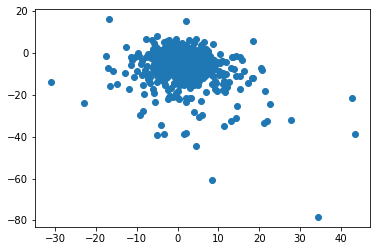

In [16]:
plt.scatter(ndf['pmra'],ndf['pmdec'])

In [17]:
x = ndf['pmra']
y = ndf['pmdec']

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler

In [19]:
Xis = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
X = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
#X = StandardScaler().fit_transform(Xis)

Estimated no. of clusters: 1
Estimated no. of noise points: 4615
Estimated no. points clustered: 191


Text(0, 0.5, '$x_2$')

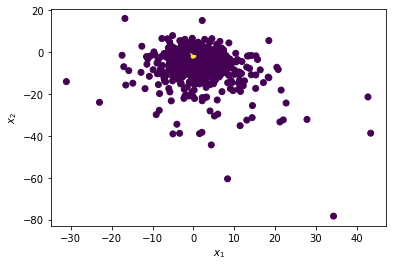

In [20]:
filipe = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['b'],ndf['l'],ndf['parallax']))[0]
db = DBSCAN(eps=0.2, min_samples=50).fit(filipe)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

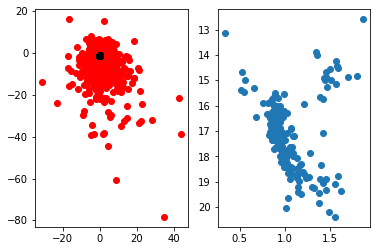

In [21]:
pontos_cluster = np.empty((0,2))
for i in range(len(Xis)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([Xis[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(Xis)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([Xis[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T


fig, ax = plt.subplots(1,2)
ax[0].scatter(xin,yin, color = 'k', zorder = 100)
ax[0].scatter(xout,yout, color = 'red')

len(xin), len(xout)

subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

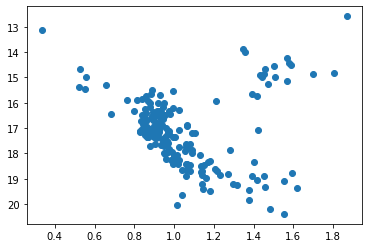

In [22]:
subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]

plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

Estimated no. of clusters: 1
Estimated no. of noise points: 4264
Estimated no. points clustered: 542


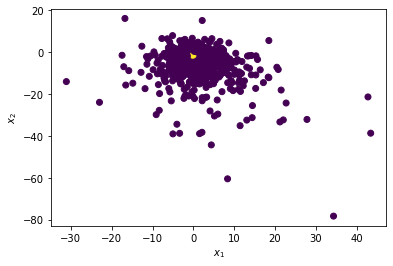

In [23]:
db = DBSCAN(eps=0.2, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

labels=db.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)
# Calculating v_measure
#print('v_measure =', v_measure_score(y, labels))

(542, 4264)

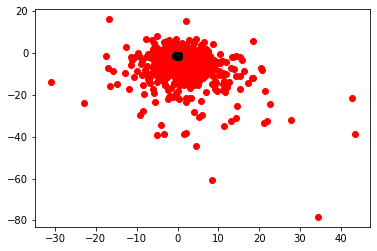

In [24]:
pontos_cluster = np.empty((0,2))
for i in range(len(Xis)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([Xis[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(Xis)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([Xis[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T

plt.scatter(xin,yin, color = 'k', zorder = 100)
plt.scatter(xout,yout, color = 'red')

len(xin), len(xout)

In [25]:
np.mean(xin),np.mean(yin)

(-0.058791002300600796, -1.3038000884953926)

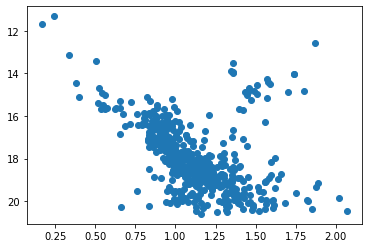

In [26]:
subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]

plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

In [27]:
subset

ra        dec      pmra  pmra_error     pmdec  pmdec_error  \
79    98.418696  20.369821  0.071538    0.689879 -1.710283     0.468221   
82    98.411945  20.380349  0.022947    0.245533 -1.008864     0.162971   
88    98.421700  20.387144  0.227386    0.842580 -1.371465     0.771207   
92    98.406996  20.383102  0.217397    0.416932 -1.570153     0.286002   
96    98.412181  20.390506 -0.211726    1.556641 -0.942713     0.917485   
...         ...        ...       ...         ...       ...          ...   
5349  98.307842  20.723179 -0.500414    0.038276 -1.388666     0.028206   
5371  98.326014  20.737153 -0.186017    0.038333 -1.625892     0.027168   
5391  98.177216  20.672381 -0.018960    0.478903 -1.291478     0.333469   
5402  98.183551  20.674316 -0.206452    0.138786 -1.470051     0.097747   
5422  98.203540  20.697568 -0.072894    0.080418 -1.427803     0.057482   

         bp_rp  phot_g_mean_mag  parallax  parallax_error  radial_velocity  \
79    1.342951        19.586109 -0.315076        0.700795              NaN   
82    1.594612        18.138573  0.190450        0.223821              NaN   
88    1.563280        19.059370  0.305677        0.397499              NaN   
92    1.128300        19.104015  0.592597        0.377044              NaN   
96    1.161844        20.596079  1.515716        1.321690              NaN   
...        ...              ...       ...             ...              ...   
5349  0.397412        15.084890  0.210554        0.036381              NaN   
5371  0.544302        14.911204  0.358639        0.035329              NaN   
5391  1.379576        19.436396  0.344501        0.541486              NaN   
5402  0.937498        16.822357  0.348390        0.139456              NaN   
5422  0.889236        16.513994  0.235133        0.082417              NaN   

      radial_velocity_error           l         b  
79                      NaN  192.785970  5.400484  
82                      NaN  192.773662  5.399617  
88                      NaN  192.771744  5.410848  
92                      NaN  192.769084  5.396731  
96                      NaN  192.764670  5.404420  
...                     ...         ...       ...  
5349                    NaN  192.422328  5.468218  
5371                    NaN  192.417560  5.489702  
5391                    NaN  192.412084  5.336279  
5402                    NaN  192.413057  5.342437  
5422                    NaN  192.400780  5.369658  

[542 rows x 14 columns]

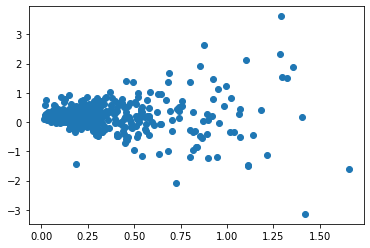

In [28]:
plt.scatter(subset['parallax_error'],subset['parallax'])